In [1]:
from openff.toolkit.topology import Molecule
from rdkit import Chem

In [2]:
mol = Chem.MolFromMolFile(f'mols_3d/1150.mol')

In [3]:

molecule = Molecule.from_rdkit(mol, allow_undefined_stereo=False)
from openff.toolkit.utils import AmberToolsToolkitWrapper
molecule.assign_partial_charges(toolkit_registry=AmberToolsToolkitWrapper(),partial_charge_method="am1bcc")

In [4]:
molecule

NGLWidget()

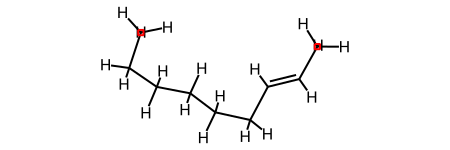

In [5]:
rdmol = molecule.to_rdkit()
rdmol


In [6]:
mol = Chem.MolFromMolFile(f'1220_mmff.mol')
molecule = Molecule.from_rdkit(mol, allow_undefined_stereo=False)
from openff.toolkit.utils import AmberToolsToolkitWrapper
molecule.assign_partial_charges(toolkit_registry=AmberToolsToolkitWrapper(),partial_charge_method="am1bcc")

In [7]:
molecule

NGLWidget()

In [2]:
 # infile = './data/COD_2021aug02.5000diverse.pkl.gz'
import gzip
import pickle
infile = './COD_2021aug02.5000diverse.pkl.gz'
with gzip.open(infile,'rb') as inf:
    ind =pickle.load(inf)
print(len(ind))

5000


In [6]:
ind[3]

('2237470', 'FC(F)(I)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)I')

In [8]:
#okay so lets get all molregnos and smiles from sql database
import gzip
import pickle
infile = 'VP_molregno_smiles.pkl.gz'
with gzip.open(infile,'rb') as inf:
    ind =pickle.load(inf)
print(len(ind))
ind[3]

3019


(2402, '[N]#[C]-[CH2]-[NH]-[c]1:[cH]:[cH]:[cH]:[cH]:[cH]:1')

In [9]:
import click
import logging
import sys
from rdkit import Chem
import gzip
from rdkit.Chem import rdDistGeom
import pickle
import rdkit
import os

In [10]:
from rdkit import Chem

from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

m = Chem.MolFromSmiles('BrC=CC1OC(C2)(F)C2(Cl)C1')

isomers = tuple(EnumerateStereoisomers(m))

len(isomers)

16

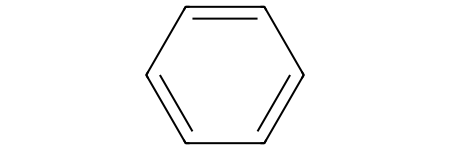

In [13]:
m = Chem.MolFromSmiles('c1ccccc1')

isomers = tuple(EnumerateStereoisomers(m))

len(isomers)
isomers[0]

In [3]:
import pandas as pd
df = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_all.tsv',sep='\t')   
#count values Temperature column
print(df['Temperature'].value_counts())
print(len(df))
df = df[df['Temperature'] == 298.15]
print(len(df))

Temperature
298.15    3098
293.15    1338
Name: count, dtype: int64
4436
3098


In [10]:
simulation_error_confids = [1645,1891,2048,2147,1220,1239,1382,1490,1519,2527,2851,2877,2924,3085,3155,3526,3667,3748,4107,3170]
radical_error_confids = [1816,1416]
stereo_error_confids = [1890,1439,1508,2373,2797,3341,3610,3784]
mdfp_missing_errors_should_be_fixed_confids = [2044,2168,2516,2820,3138,3159,3726,4202]
charge_errors_confids = [2058,2342]
charge_confgen_errors_confids = [1205,3075,3547,4137]
unasigned_bonderror_confids = [3736]
unasigned_angle_error_confids = [4078]
print('simulation_error_confids',len(simulation_error_confids))
print('radical_error_confids',len(radical_error_confids))
print('stereo_error_confids',len(stereo_error_confids))
print('mdfp_missing_errors_should_be_fixed_confids',len(mdfp_missing_errors_should_be_fixed_confids))
print('charge_errors_confids',len(charge_errors_confids))
print('charge_confgen_errors_confids',len(charge_confgen_errors_confids))
print('unasigned_bonderror_confids',len(unasigned_bonderror_confids))
print('unasigned_angle_error_confids',len(unasigned_angle_error_confids))
#total:
print('total errors:', len(simulation_error_confids)+len(radical_error_confids)+len(stereo_error_confids)+len(mdfp_missing_errors_should_be_fixed_confids)+len(charge_errors_confids)+len(charge_confgen_errors_confids)+len(unasigned_bonderror_confids)+len(unasigned_angle_error_confids))

confids_errors_all = simulation_error_confids+radical_error_confids+stereo_error_confids+mdfp_missing_errors_should_be_fixed_confids+charge_errors_confids+charge_confgen_errors_confids+unasigned_bonderror_confids+unasigned_angle_error_confids
print(len(confids_errors_all))
print(len(set(confids_errors_all)))

simulation_error_confids 20
radical_error_confids 2
stereo_error_confids 8
mdfp_missing_errors_should_be_fixed_confids 8
charge_errors_confids 2
charge_confgen_errors_confids 4
unasigned_bonderror_confids 1
unasigned_angle_error_confids 1
total errors: 46
46
46


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
import os
import json
import uuid

import rdkit
print(rdkit.__version__)
import lwreg
from lwreg import standardization_lib
from lwreg import utils
import psycopg2
import pandas as pd
import psycopg2
hostname = 'scotland'
dbname = 'cs_mdfps'
username = 'cschiebroek'
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()



2023.03.3


In [9]:
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM cs_mdfps_schema.experimental_data")
results = cur.fetchall()    
len(results)

3066

In [3]:
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM conformers")
results = cur.fetchall()    
len(results)

14455

In [6]:
#print columns
column_names = [desc[0] for desc in cur.description]
print(column_names)

['conf_id', 'molregno', 'conformer_hash', 'molblock']


In [43]:
#df from results
import pandas as pd
df = pd.DataFrame(results,columns=['conf_id','molregno','conformer_hash','molblock'])
molregnos = df['molregno'].tolist()
unique_molregnos = list(set(molregnos))
molregno_counts = [molregnos.count(x) for x in unique_molregnos]
print(len(unique_molregnos))

3072


In [12]:
len([count for count in molregno_counts if count == 1])

52

In [13]:
len([count for count in molregno_counts if count == 2])

622

In [45]:
#get the molblocks for molregnos that have two entries
molregno_counts_2 = [unique_molregnos[i] for i, x in enumerate(molregno_counts) if x == 2]
print(len(molregno_counts_2))
molregno_counts_2[1]

df_duplictes = df[df['molregno'].isin(molregno_counts_2)]
df_duplictes
molblock_pairs = []
for molregno in molregno_counts_2:
    molblock_pairs.append(df_duplictes[df_duplictes['molregno'] == molregno]['molblock'].tolist())
    


622


In [65]:
duplicate_confids = df_duplictes['conf_id'].tolist()
#save as pickle
import pickle
with open('duplicate_confids.pkl','wb') as f:
    pickle.dump(duplicate_confids,f)

In [50]:
#now iterate,make mols and do rmsd
rmsds = []
for pair in molblock_pairs:
    mol1 = Chem.MolFromMolBlock(pair[0])
    mol2 = Chem.MolFromMolBlock(pair[1])
    rmsds.append(Chem.rdMolAlign.AlignMol(mol1,mol2))

[08:21:10] Warning: molecule is tagged as 3D, but all Z coords are zero


2
479


Text(1.0, 100, 'RMSD <= 0.1: 479, total 622')

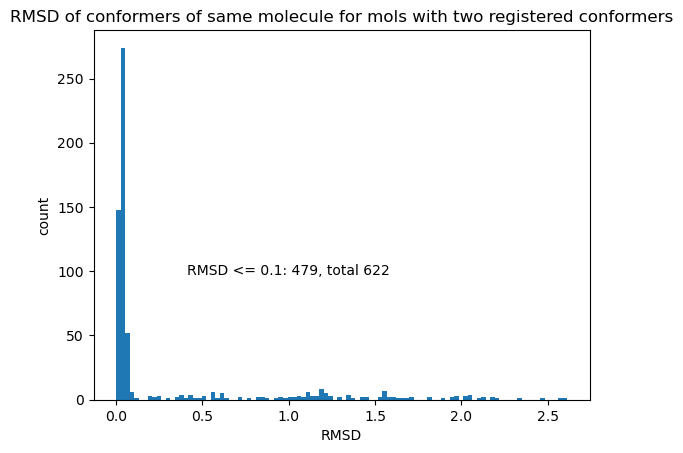

In [66]:
#plot
import matplotlib.pyplot as plt
plt.hist(rmsds,bins=100)
plt.xlabel('RMSD')
plt.ylabel('count')
plt.title('RMSD of conformers of same molecule for mols with two registered conformers')
#get the ones that have a rmsd of 0, and those with > 0.1
zero_rmsd = [i for i, x in enumerate(rmsds) if x == 0]
print(len(zero_rmsd))
rmsd_01 = [i for i, x in enumerate(rmsds) if x <= 0.1]
print(len(rmsd_01))
#add that numbner as txt
plt.text(1.0, 100, f'RMSD <= 0.1: {len(rmsd_01)}, total {len(rmsds)}', horizontalalignment='center',verticalalignment='center')

In [78]:
#get molregnos for rmsd <= 0.1
molregnos_01 = [molregno_counts_2[i] for i in rmsd_01]
print(len(molregnos_01))
molregnos_01[1]
#get confids for these molregnos
confids_01 = []
for molregno in molregnos_01:
    confids_01.extend(df_duplictes[df_duplictes['molregno'] == molregno]['conf_id'].tolist())
print(len(confids_01))
confids_01[1]
with open('duplicate_confids.pkl','wb') as f:
    pickle.dump(confids_01,f)

479
958


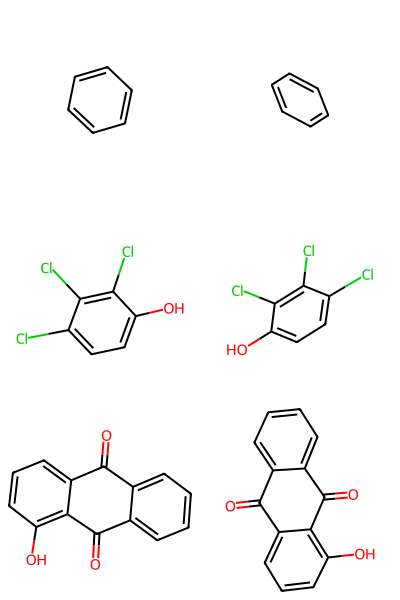

In [81]:
#get molblocks for first 5 of these confids
molblocks_01 = []
for confid in confids_01[:6]:
    molblocks_01.append(df_duplictes[df_duplictes['conf_id'] == confid]['molblock'].tolist()[0])
mols_01 = [Chem.MolFromMolBlock(molblock) for molblock in molblocks_01]
Draw.MolsToGridImage(mols_01,molsPerRow=2,subImgSize=(200,200))

In [76]:
df_duplictes[df_duplictes['molregno'] == molregnos_01[1]]   

,conf_id,molregno,conformer_hash,molblock
37,1157,14,"-0.647,-1.355,-0.227;-1.112,0.918,0.163;-1.589...",[H]Oc1c([H])c([H])c(Cl)c(Cl)c1Cl\n RDKit ...
6853,7974,14,"-0.235,-0.186,1.547;-1.138,1.392,0.004;-1.284,...",\n RDKit 3D\n\n 0 0 0 0 0 0...


In [20]:
import pandas as pd
df_original = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_all.tsv', sep='\t')
df_original = df_original[df_original['Temperature'] == 298.15 ]
df_new = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/experimental_data_shuze/cleaned_vp_all_298_no_dups.tsv', sep='\t')

In [21]:
df_new

,Unnamed: 0.1,Unnamed: 0,hash_code,SMILES,Temperature,Vapour Pressure (log10 kPa),Source
0,0,0,000c0dc393452e54c19cae2c6501b956,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,298.15,-14.744727,REACH
1,1,2,0026cd05c00286506e4c0051abcde83f,[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...,298.15,-0.301067,PUBCHEM
2,2,3,0029fb907f0382cb8ba7913301e791ec,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...,298.15,-6.053323,OCHEM
3,3,4,0050ebd8f62aa0dd9dd972b02e277f5b,[Cl]-[CH2]-[O]-[CH2]-[Cl],298.15,0.591625,OCHEM
4,4,5,0067f638b002221144b4e1108f7d3ae5,[CH3]-[C]#[C]-[CH](-[CH3])-[CH3],298.15,1.227887,CRC
...,...,...,...,...,...,...,...
3061,3069,4430,ff4e979f0b36ff50fd00e1edd51b6f76,[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...,298.15,-6.770000,OCHEM
3062,3070,4431,ff58752f0a4348832f35917fb8a400b7,[F]-[C](-[F])(-[F])-[Cl],298.15,3.457729,OCHEM
3063,3071,4432,ff95923bf16fe07ac570f8748369e744,[CH3]-[C](=[O])-[C]1=[C](-[CH3])-[CH]2-[CH2]-[...,298.15,2.397940,REACH
3064,3072,4433,ffa1925cb04fcea328a8b6cae4887000,[O]=[CH]-[C@H](-[OH])-[C@@H](-[OH])-[C@H](-[OH...,298.15,-10.580632,OCHEM


In [22]:
#make new dataframe with all pooint in df_original that are not in df_new
df_missing = df_original[~df_original['hash_code'].isin(df_new['hash_code'])]
print(len(df_missing))

32


32


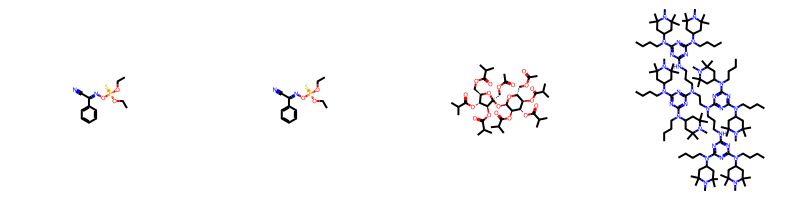

In [39]:
smiles_missing = df_missing['SMILES'].tolist()
#sort smiles
smiles_missing.sort()
from rdkit import Chem
mols = [Chem.MolFromSmiles(smile) for smile in smiles_missing]
#sort by number of heavy atoms
mols.sort(key=lambda x: x.GetNumHeavyAtoms())
print(len(mols))
#draw
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
mols_pt_2 = mols[17:]
mols_pt_3 = mols[28:]
Draw.MolsToGridImage(mols_pt_3, molsPerRow=4, subImgSize=(200, 200), maxMols=12)


In [3]:
#lets see performance on only diverse conformers.
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
import os
import json
import uuid

import rdkit
print(rdkit.__version__)
import lwreg
from lwreg import standardization_lib
from lwreg import utils
import psycopg2
import pandas as pd
import psycopg2
hostname = 'scotland'
dbname = 'cs_mdfps'
username = 'cschiebroek'
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM cs_mdfps_schema.experimental_data")
results = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
df = pd.DataFrame(results,columns=column_names)
df

2023.03.3


,molregno,logp,logp_metadata,vp_log10pa,vp_metadata
0,2669,0,{},2.241749,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2...
1,15648,0,{},-5.585027,{'SMILES': '[CH3]-[C](=[O])-[O]-[CH2]-[C@H]1-[...
2,15649,0,{},-10.017729,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[N](-[c]1:...
3,2670,0,{},-0.580000,{'SMILES': '[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]...
4,2671,0,{},-2.309250,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...
...,...,...,...,...,...
3037,4238,0,{},0.999963,{'SMILES': '[CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH...
3038,4239,0,{},-1.650000,{'SMILES': '[OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]'...
3039,4240,0,{},-4.301899,{'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...
3040,4241,0,{},-5.356584,{'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...


In [2]:
#all experimental data from log10 kPa to Pa
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM cs_mdfps_schema.experimental_data")
results = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
df = pd.DataFrame(results,columns=column_names)
df
#little check: for all values in column vp, take the base (from log10) and convert to Pa (muliplied by 10^3 from kPa to Pa)
import numpy as np
# df['vp Pa'] = df['vp'].apply(lambda x: np.power(10,x)*1000)
# #and take log10 from this
# df['vp log10 Pa'] = df['vp Pa'].apply(lambda x: np.log10(x))
# #compare to just doing -3 everywhere
# df['vp log10 Pa v2'] = df['vp'].apply(lambda x: x+3)
#mm, okay that is strange. Letss get the original values; first unpack the smiles in sperate column. This is now stored as a dict in vp_metadata
df['SMILES'] = df['vp_metadata'].apply(lambda x: x['SMILES'])
df = df.drop(columns=['logp','logp_metadata','vp_metadata',"SMILES"])
#change name vp to VP_original
df = df.rename(columns={'vp':'VP_original'})
df['VP_log10Pa'] = df['VP_original'].apply(lambda x: x+3)
#way two: first go to kPa
df['VP_kPa'] = df['VP_original'].apply(lambda x: np.power(10,x))
#then go to Pa
df['VP_Pa'] = df['VP_kPa'].apply(lambda x: x*1000)
#then take log10
df['VP_log10Pa_v2'] = df['VP_Pa'].apply(lambda x: np.log10(x))
#check if VP_log10Pa is the same as VP_log10Pa_v2
df

,molregno,VP_original,VP_log10Pa,VP_kPa,VP_Pa,VP_log10Pa_v2
0,2669,-0.758251,2.241749,1.744812e-01,1.744812e+02,2.241749
1,2670,-3.580000,-0.580000,2.630268e-04,2.630268e-01,-0.580000
2,2671,-5.309250,-2.309250,4.906250e-06,4.906250e-03,-2.309250
3,2672,0.728915,3.728915,5.356915e+00,5.356915e+03,3.728915
4,2673,-5.770647,-2.770647,1.695715e-06,1.695715e-03,-2.770647
...,...,...,...,...,...,...
3061,4242,-6.770000,-3.770000,1.698244e-07,1.698244e-04,-3.770000
3062,4243,3.457729,6.457729,2.868989e+03,2.868989e+06,6.457729
3063,4244,2.397940,5.397940,2.500000e+02,2.500000e+05,5.397940
3064,1087,-10.580632,-7.580632,2.626443e-11,2.626443e-08,-7.580632


In [3]:
#so we should update this value in the database
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM cs_mdfps_schema.experimental_data")
results = cur.fetchall()
#print the column names
column_names = [desc[0] for desc in cur.description]
print(column_names)
#update the database
for result in results:
    vp = result[3]
    vp_new = vp+3
    molregno = result[0]
    cur.execute(f"UPDATE cs_mdfps_schema.experimental_data SET vp = {vp_new} WHERE molregno = {molregno}")
#check, retrieve values for molregnos test list
molregno_test_list = df['molregno'].tolist()
molregno_test_list = molregno_test_list[:5]
cur.execute(f"SELECT * FROM cs_mdfps_schema.experimental_data WHERE molregno IN {tuple(molregno_test_list)}")
results = cur.fetchall()
df = pd.DataFrame(results,columns=column_names)
df.head()

['molregno', 'logp', 'logp_metadata', 'vp', 'vp_metadata']


,molregno,logp,logp_metadata,vp,vp_metadata
0,2669,0,{},2.241749,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2...
1,2670,0,{},-0.580000,{'SMILES': '[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]...
2,2671,0,{},-2.309250,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...
3,2672,0,{},3.728915,{'SMILES': '[CH3]-[CH](-[CH3])-[CH2]-[O]-[CH]=...
4,2673,0,{},-2.770647,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...


In [4]:
cn.commit()

In [7]:
cur.close()
cn.close()

In [6]:
#double check, retrieve again:
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM cs_mdfps_schema.experimental_data")
results = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
df_updated = pd.DataFrame(results,columns=column_names)
df_updated

,molregno,logp,logp_metadata,vp,vp_metadata
0,2669,0,{},2.241749,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2...
1,2670,0,{},-0.580000,{'SMILES': '[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]...
2,2671,0,{},-2.309250,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...
3,2672,0,{},3.728915,{'SMILES': '[CH3]-[CH](-[CH3])-[CH2]-[O]-[CH]=...
4,2673,0,{},-2.770647,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...
...,...,...,...,...,...
3061,4238,0,{},0.999963,{'SMILES': '[CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH...
3062,4239,0,{},-1.650000,{'SMILES': '[OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]'...
3063,4240,0,{},-4.301899,{'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...
3064,4241,0,{},-5.356584,{'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...


In [8]:
#now change the column name vp to vp_log10Pa in the database
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("ALTER TABLE cs_mdfps_schema.experimental_data RENAME COLUMN vp TO vp_log10Pa")
cn.commit()
cur.close()
cn.close()

In [36]:
df_original = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_all.tsv', sep='\t')
df_original = df_original[df_original['Temperature'] == 298.15 ]
df_original

,hash_code,SMILES,Temperature,Vapour Pressure (log10 kPa),Source
0,000c0dc393452e54c19cae2c6501b956,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,298.15,-14.744727,REACH
2,0026cd05c00286506e4c0051abcde83f,[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...,298.15,-0.301067,PUBCHEM
3,0029fb907f0382cb8ba7913301e791ec,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...,298.15,-6.053323,OCHEM
4,0050ebd8f62aa0dd9dd972b02e277f5b,[Cl]-[CH2]-[O]-[CH2]-[Cl],298.15,0.591625,OCHEM
5,0067f638b002221144b4e1108f7d3ae5,[CH3]-[C]#[C]-[CH](-[CH3])-[CH3],298.15,1.227887,CRC
...,...,...,...,...,...
4430,ff4e979f0b36ff50fd00e1edd51b6f76,[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...,298.15,-6.770000,OCHEM
4431,ff58752f0a4348832f35917fb8a400b7,[F]-[C](-[F])(-[F])-[Cl],298.15,3.457729,OCHEM
4432,ff95923bf16fe07ac570f8748369e744,[CH3]-[C](=[O])-[C]1=[C](-[CH3])-[CH]2-[CH2]-[...,298.15,2.397940,REACH
4433,ffa1925cb04fcea328a8b6cae4887000,[O]=[CH]-[C@H](-[OH])-[C@@H](-[OH])-[C@H](-[OH...,298.15,-10.580632,OCHEM


In [37]:
#merge on smiles
df_merged = df.merge(df_original, on='SMILES')
# #make column 'Vapour Pressure kPa', taken from Vapour Pressure (log10 kPa)
# df_merged['Vapour Pressure kPa'] = df_merged['Vapour Pressure (log10 kPa)'].apply(lambda x: np.power(10,x))
# #double check; make new column with log10 from this
# df_merged['Vapour Pressure log10 kPa'] = df_merged['Vapour Pressure kPa'].apply(lambda x: np.log10(x))
# #okay and now we make the Vapour Pressure in Pa
# df_merged['Vapour Pressure Pa'] = df_merged['Vapour Pressure kPa'].apply(lambda x: x*1000)
# #and take log10 from this
# df_merged['Vapour Pressure log10 Pa'] = df_merged['Vapour Pressure Pa'].apply(lambda x: np.log10(x))
# df_merged
# #triple check, new column where we take the Vapour Pressure log10 Pa, go to Pa, go to KPa and take log10
df_merged
#drop logp, logp_metadata
df_merged = df_merged.drop(columns=['logp','logp_metadata','hash_code','Temperature','vp_metadata',"SMILES",'Source'])
df_merged


,molregno,vp,Vapour Pressure (log10 kPa)
0,2669,-0.758251,-0.758251
1,2670,-3.580000,-3.580000
2,2671,-5.309250,-5.309250
3,2672,0.728915,0.728915
4,2673,-5.770647,-5.770647
...,...,...,...
3061,4242,-6.770000,-6.770000
3062,4243,3.457729,3.457729
3063,4244,2.397940,2.397940
3064,1087,-10.580632,-10.580632


In [4]:
#so we should update this value in the database
cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
cur.execute("SELECT * FROM cs_mdfps_schema.experimental_data")
results = cur.fetchall()

In [7]:
results[0][4]

{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-1',
 'Source': 298.15,
 'Temperature': 298.15}